<a href="https://colab.research.google.com/github/AamirJafaq/Student-Score-Prediction/blob/main/Student_Score_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Student Score Prediction

* Dataset (Recommended): Student Performance Factors (Kaggle)
* Build a model to predict students' exam scores based on their study hours
* Perform data cleaning and basic visualization to understand the dataset
* Split the dataset into training and testing sets
* Train a linear regression model to estimate final scores
* Visualize predictions and evaluate model performance





In [39]:
import pandas as pd
import numpy as np

I am using colab. So, I attached a csv file with python script to upload the file. Otherwise you can upload csv file in other ways if you are using GitHub or saving file in local computer.

In [40]:
data=pd.read_csv("https://raw.githubusercontent.com/AamirJafaq/Student-Score-Prediction/refs/heads/main/StudentPerformanceFactors.csv")

In [41]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [43]:
# Getting numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [44]:
# Getting categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [45]:
data.isna().sum().sort_values(ascending=False)

,0
Parental_Education_Level,90
Teacher_Quality,78
Distance_from_Home,67
Hours_Studied,0
Access_to_Resources,0
Parental_Involvement,0
Attendance,0
Extracurricular_Activities,0
Motivation_Level,0
Internet_Access,0


Note that only three columns Parental_Education_Level, Teacher_Quality and Distance_from_Home has missing values. However, these columns are utilized in modeling. So, we are not removing null values.

In this project, we need to design a linear regression to predict students' exam scores based on their study hours. Choose only relevant columns/features i.e Exam_Score and Hours_Studied.


In [46]:
df=data[["Hours_Studied", "Exam_Score"]]
df.head()

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

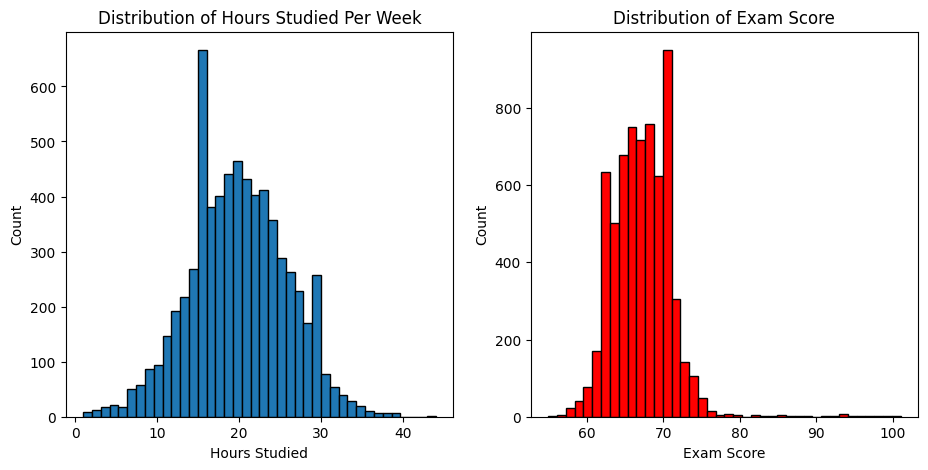

In [48]:
fig, axes=plt.subplots(1,2, figsize=(11,5))
axes[0].hist(df["Hours_Studied"], bins=40, edgecolor='black')
axes[0].set_title("Distribution of Hours Studied Per Week")
axes[0].set_xlabel("Hours Studied")
axes[0].set_ylabel("Count")
axes[1].hist(df["Exam_Score"], bins=40, edgecolor='black', color="red")
axes[1].set_title("Distribution of Exam Score")
axes[1].set_xlabel("Exam Score")
axes[1].set_ylabel("Count")

<Axes: title={'center': 'Hours Studied vs Exam Score'}, xlabel='Hours Studied Per Week', ylabel='Exam Score'>

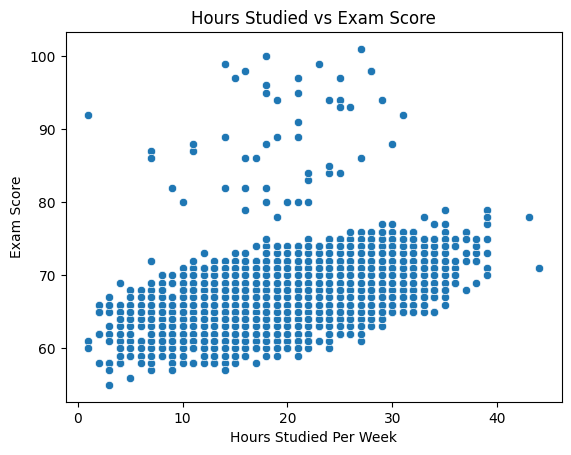

In [49]:
plt.xlabel("Hours Studied Per Week")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
sns.scatterplot(df, x="Hours_Studied", y="Exam_Score")

Observe histograms and scatter plot that the feature Hours_Studied has no potential outliers. The data is normally distributed. However, the target variable Exam_Score is skewed. It has potential outlinear, but we will not remove the outliear because it might possible in real life that students get high score eventough they study less.


In [50]:
# Getting feature column and convert it into numpy array
X=df[["Hours_Studied"]].values
# Getting target column and convert it into numpy array
y=df[["Exam_Score"]].values

## Regression Model

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train , X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=20)

In [53]:
print(f"Training dataset size is {X_train.shape[0]}")
print(f"Training dataset size is {X_test.shape[0]}")

Training dataset size is 5285
Training dataset size is 1322


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred=model.predict(X_test)

Now, we will find the performance metrics to evaluate the performane of the model.


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
MSE= mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error for Linear Regression: {MSE:.4f}")
print(f"R2 Score for Linear Regression: {R2:.4f}")

Mean Squared Error for Linear Regression: 10.2554
R2 Score for Linear Regression: 0.2238


Note that R2 score is close to 0. It means the model performs poorly on the data. One of the reason may be outliers.

Now, we will plot the actual test data and the linear regression line.

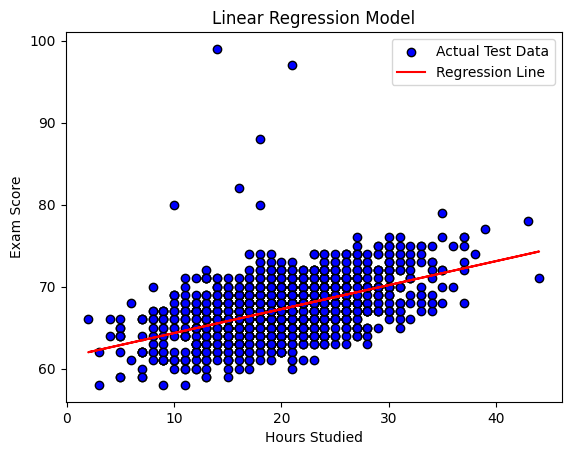

In [59]:
plt.scatter(X_test, y_test, color="blue",edgecolors="black", label="Actual Test Data")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression Model")
plt.plot(X_test,y_pred, color="red", label="Regression Line")
plt.legend()
plt.show()

## Polynomial Regression Model

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [61]:
metrics=[]
y_lpred=[]
for deg in range(2,6):
  model=Pipeline([("poly", PolynomialFeatures(degree=deg, include_bias=True)), ("linear_Model", LinearRegression())])
  model.fit(X_train, y_train)
  y_lpred.append({f"y_pred{deg}": model.predict(X_test)})
  MSE= mean_squared_error(y_test, y_lpred[deg-2][f"y_pred{deg}"])
  R2 = r2_score(y_test, y_lpred[deg-2][f"y_pred{deg}"])
  metrics.append({"deg": deg, "MSE": MSE, "R2": R2})
metrics = pd.DataFrame(metrics).sort_values("deg")
metrics

,deg,MSE,R2
0,2,10.240550,0.224957
1,3,10.278550,0.222081
2,4,10.273665,0.222450
3,5,10.272387,0.222547


Now, we will plot the actual test data and the ploynomial curves of different degrees.

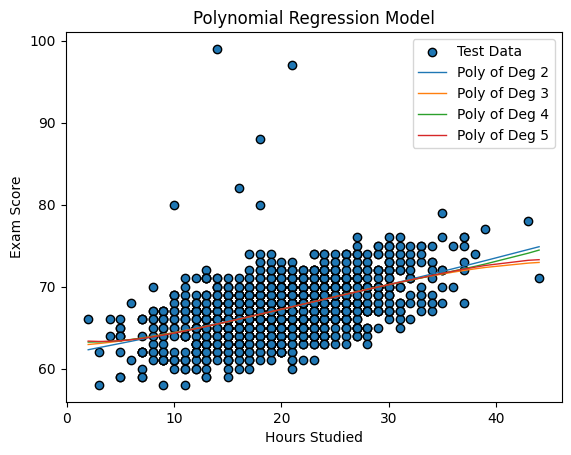

In [62]:
# Sort the X_test and predicted values.
ind=np.argsort(X_test.flatten())
X_test_sort=X_test.flatten()[ind]
plt.scatter(x=X_test, y=y_test, edgecolors="black", label="Test Data")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Model")
for i, pred in zip(range(len(y_lpred)), y_lpred):
  y_pred_sort=y_lpred[i][f"y_pred{i+2}"].flatten()[ind]
  plt.plot(X_test_sort, y_pred_sort, linewidth=1, label=f"Poly of Deg {i+2}")
plt.legend()
plt.show()

**COMPARISON** \
The polynomial regression model and the linear regression model perform almost the same. This can happen for several reasons. One reason is that the relationship in the data is actually linear, so adding nonlinear terms doesn’t help the model make better predictions. Another reason is that there might be a small curve in the data, but the dataset is too small or too noisy. In this situation, the polynomial model cannot clearly detect the curve, so it ends up behaving very similar to the linear model.

## Linear & Poly Regression with Multi Features

In [63]:
X=data[["Hours_Studied", "Sleep_Hours", "Attendance", "Parental_Involvement"]]
y=data[["Exam_Score"]]

In [64]:
from sklearn.preprocessing import OrdinalEncoder

Now, we will encode the categorical column Parental_Involvement.

In [65]:
order = [["Low", "Medium", "High"]]
ordinal_encod=OrdinalEncoder(categories=order)
X["Parental_Involvement"]=ordinal_encod.fit_transform(X["Parental_Involvement"].values.reshape(-1,1))

/tmp/ipython-input-1491086638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Parental_Involvement"]=ordinal_encod.fit_transform(X["Parental_Involvement"].values.reshape(-1,1))


In [66]:
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model_x=LinearRegression()
linear_model_x.fit(X_train_x, y_train_x)
y_pred_x=linear_model_x.predict(X_test_x)

In [67]:
print(f"Mean Squared Error for Linear Regression: {mean_squared_error(y_test_x, y_pred_x):.4f}")
print(f"R2 Score for Linear Regression: {r2_score(y_test_x, y_pred_x):.4f}")

Mean Squared Error for Linear Regression: 5.3908
R2 Score for Linear Regression: 0.6186


Notice that the mean squared error decreased and also the R2 score got closer to 1. It means the model perform better after including more features.

In [68]:
metrics_x=[]
y_lpred_x=[]
for deg in range(2,6):
  model=Pipeline([("poly_x", PolynomialFeatures(degree=deg, include_bias=True)), ("linear_Model_x", LinearRegression())])
  model.fit(X_train_x, y_train_x)
  y_lpred_x.append({f"y_pred_x{deg}": model.predict(X_test_x)})
  MSE= mean_squared_error(y_test_x, y_lpred_x[deg-2][f"y_pred_x{deg}"])
  R2 = r2_score(y_test_x, y_lpred_x[deg-2][f"y_pred_x{deg}"])
  metrics_x.append({"deg_x": deg, "MSE_x": MSE, "R2_x": R2})
metrics_x = pd.DataFrame(metrics_x).sort_values("deg_x")
metrics_x

,deg_x,MSE_x,R2_x
0,2,5.404070,0.617684
1,3,5.421269,0.616467
2,4,5.617280,0.602600
3,5,5.991343,0.576136


**COMPARISON AFTER ADDING MORE FEATURES** \
After adding new features like parental involvement, sleep hours, and attendance, the model performed better. The R² score increased from about 0.2 (with one feature) to over 0.61 (with multiple features), and the mean squared error went down. However, even with these new features, the linear regression and polynomial regression models still performed almost the same.